Section4：勾配降下法

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:

def f(x):
    y = 3 * x[0] + 2 * x[1]
    return y

def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    a = 10
    return 1 / (1 + np.exp(-a * x))

def d_mean_squared_error(d, y):
    if type(d) == np.ndarray:
        batch_size = d.shape[0]
        dx = (y - d)/batch_size
    else:
        dx = y - d
    return dx

def mean_squared_error(d, y):
    return np.mean(np.square(d - y)) / 2

# 初期設定
def init_network():
    network = {}
    nodesNum = 10
    network['W1'] = np.random.randn(2, nodesNum)
    network['W2'] = np.random.randn(nodesNum)
    network['b1'] = np.random.randn(nodesNum)
    network['b2'] = np.random.randn()
    return network

# 順伝播
def forward(network, x):
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    u1 = np.dot(x, W1) + b1
    z1 = relu(u1)
    
    u2 = np.dot(z1, W2) + b2
    y = u2

    return z1, y

# 誤差逆伝播
def backward(x, d, z1, y):
    grad = {}
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    delta2 = d_mean_squared_error(d, y) # 出力層でのデルタ
    grad['b2'] = np.sum(delta2, axis=0) # b2の勾配
    grad['W2'] = np.dot(z1.T, delta2) # W2の勾配

    delta1 = np.dot(delta2, W2.T) * sigmoid(z1)
    delta1 = delta1[np.newaxis, :]
    grad['b1'] = np.sum(delta1, axis=0) # b1の勾配
    x = x[np.newaxis, :]
    grad['W1'] = np.dot(x.T, delta1) # W1の勾配
    
    return grad
    

In [9]:

# サンプルデータを作成
data_sets_size = 100000
data_sets = [0 for i in range(data_sets_size)]

for i in range(data_sets_size):
    data_sets[i] = {}
    # ランダムな値を設定
    data_sets[i]['x'] = np.random.rand(2)
    
    ## 試してみよう_入力値の設定
    # data_sets[i]['x'] = np.random.rand(2) * 10 -5 # -5〜5のランダム数値
    
    # 目標出力を設定
    data_sets[i]['d'] = f(data_sets[i]['x'])

In [12]:

losses = []
# 学習率
learning_rate = 0.1

# 抽出数
epoch = 1000

# パラメータの初期化
network = init_network()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)


##### 結果表示 #####


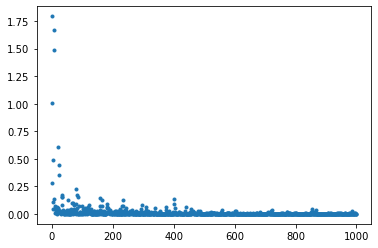

In [13]:

# 勾配降下の繰り返し
for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward(network, x)
    grad = backward(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]

    # 誤差
    loss = mean_squared_error(d, y)
    losses.append(loss)

print("##### 結果表示 #####")    
lists = range(epoch)

# エポックを重ねるごとに誤差が減っていく
plt.plot(lists, losses, '.')